# Data EDA

In [17]:
import pandas as pd

# Graphical imports
import matplotlib.pyplot as plt
import matplotlib.ticker as pf
import seaborn as sns

## Import cleaned data

In [29]:
# Source 1 for parse_dates
df = pd.read_csv('../data/cleaned_video_game_sales.csv', parse_dates=['release_year'])

## Perform EDA on all columns

In [30]:
df.head()

,name,platform,release_year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          16717 non-null  object        
 1   platform      16719 non-null  object        
 2   release_year  16450 non-null  datetime64[ns]
 3   genre         16717 non-null  object        
 4   publisher     16665 non-null  object        
 5   na_sales      16719 non-null  float64       
 6   eu_sales      16719 non-null  float64       
 7   jp_sales      16719 non-null  float64       
 8   other_sales   16719 non-null  float64       
 9   global_sales  16719 non-null  float64       
 10  critic_score  8137 non-null   float64       
 11  critic_count  8137 non-null   float64       
 12  user_score    7590 non-null   float64       
 13  user_count    7590 non-null   float64       
 14  developer     10096 non-null  object        
 15  rating        9950 non-null   object

Huh. Pandas turned the ints into floats... that sucks.

### Genre

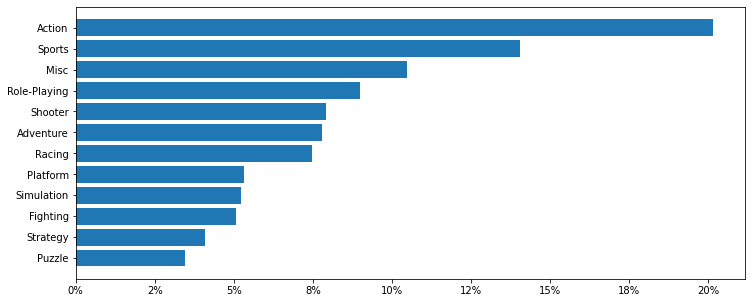

In [19]:
# Plot out the distribution of genres
plt.figure(figsize = (12, 5))

# temp variable to hold the data I want to graph
t = df.genre.value_counts(normalize=True)

plt.barh(t.index[::-1], t.values[::-1])

plt.gca().xaxis.set_major_formatter(pf.PercentFormatter(1, 0));

> Observations:

For someone as detail-oriented as myself, I find the current 'genre' field to be unhelpfully vague. For example, many games fall under both 'action' and 'adventure' genres, such as the Uncharted series. I suppose that feeling is because I'm spoiled by the 'subcategory' field from the kickstarter dataset I looked at for initiation. Where each category had its own list of subcategories. C'est la vie. I can understand why these sites would oversimplify category, since they're audience is presumably non-technical. Doesn't mean I agree with it, but that's a discussion for another day.

It would be nice to know what genres go under the miscellaneous umbrella.

In [37]:
df.release_year.value_counts().sort_index()

1980-01-01       9
1981-01-01      46
1982-01-01      36
1983-01-01      17
1984-01-01      14
1985-01-01      14
1986-01-01      21
1987-01-01      16
1988-01-01      15
1989-01-01      17
1990-01-01      16
1991-01-01      41
1992-01-01      43
1993-01-01      62
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     289
1998-01-01     379
1999-01-01     338
2000-01-01     350
2001-01-01     482
2002-01-01     829
2003-01-01     775
2004-01-01     762
2005-01-01     939
2006-01-01    1006
2007-01-01    1197
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2011-01-01    1136
2012-01-01     653
2013-01-01     544
2014-01-01     581
2015-01-01     606
2016-01-01     502
2017-01-01       3
2020-01-01       1
Name: release_year, dtype: int64

## Check for outliers

In [38]:
df.head(1)

,name,platform,release_year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E


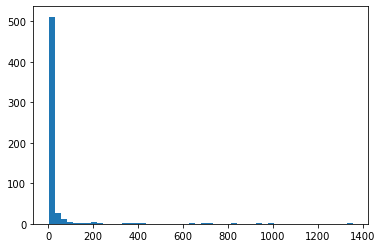

In [56]:
plt.hist(df.publisher.value_counts(), bins=50);

In [55]:
# List of outlier publishers
t = df.publisher.value_counts()
t[t > 200]

Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   706
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Name: publisher, dtype: int64

In [57]:
df.describe()

,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


Investigate sales = 0.

And investigate percentile sales == 0

In [66]:
print(df[df.na_sales == 0].shape[0])
print(df[df.eu_sales == 0].shape[0])
print(df[df.jp_sales == 0].shape[0])
print(df[df.other_sales == 0].shape[0])

4511
5874
10515
6604


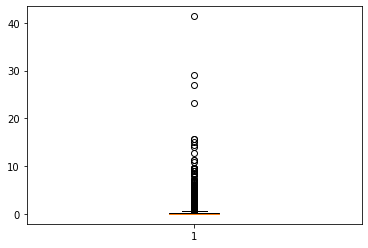

In [78]:
plt.boxplot(df.na_sales);

## Investigate coefficients between features

In [87]:
x = df.drop(columns=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])

In [83]:
x.corr()

,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count
na_sales,1.000000,0.841808,0.468607,0.726757,0.955793,0.233580,0.283917,0.085796,0.246208
eu_sales,0.841808,1.000000,0.519929,0.716330,0.939313,0.213102,0.265740,0.055915,0.283504
jp_sales,0.468607,0.519929,1.000000,0.394823,0.613546,0.147314,0.168299,0.127521,0.072773
other_sales,0.726757,0.716330,0.394823,1.000000,0.804028,0.191509,0.239513,0.057083,0.240085
global_sales,0.955793,0.939313,0.613546,0.804028,1.000000,0.237556,0.290397,0.088349,0.264151
critic_score,0.233580,0.213102,0.147314,0.191509,0.237556,1.000000,0.396478,0.580318,0.265639
critic_count,0.283917,0.265740,0.168299,0.239513,0.290397,0.396478,1.000000,0.195087,0.365603
user_score,0.085796,0.055915,0.127521,0.057083,0.088349,0.580318,0.195087,1.000000,0.017546
user_count,0.246208,0.283504,0.072773,0.240085,0.264151,0.265639,0.365603,0.017546,1.000000


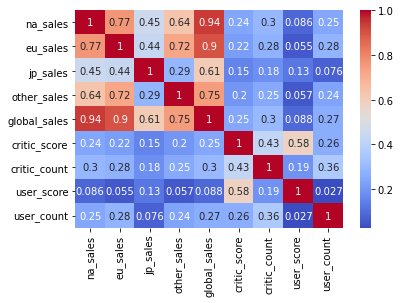

In [90]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

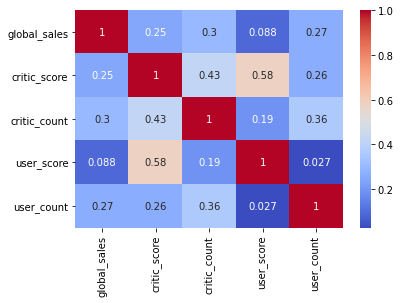

In [91]:
sns.heatmap(x.corr(), annot=True, cmap='coolwarm');

Interesting how sales and user scores have near zero correlation. And an ever so slight positive correlation in critic score. Interesting NA sales that have the highest correlation between critic score & sales, and user score & sales.

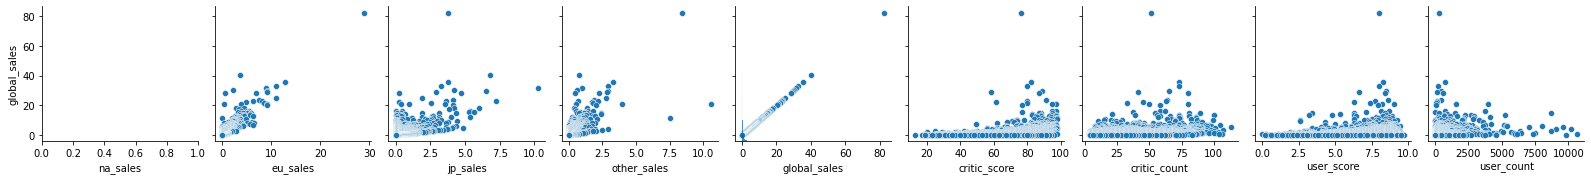

In [97]:
sns.pairplot(df, x_vars=df.select_dtypes(include='float64').columns, y_vars=['global_sales']);

In [96]:
df.select_dtypes(include='float64').columns

Index(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'critic_score', 'critic_count', 'user_score', 'user_count'],
      dtype='object')

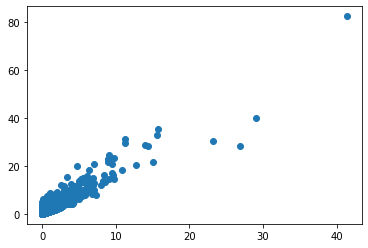

In [95]:
plt.scatter(df.na_sales, df.global_sales);

Oh, there's a huge outlier in global sales

In [101]:
df.sort_values(by='global_sales', ascending=False).head()

,name,platform,release_year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Ah, its Wii Sports. That's because it was included with every Wii, which sold like gangbusters. If I wanted to remove Wii Sports from the dataset, I would need to remove all other games that came with their systems too. And I don't have the time to do that kind of research.

## Sources
1. https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values